# Introduction to Programming Artificial Intelligence 

## Class 8 - Manipulating Pandas

In [1]:
import pandas as pd
df = pd.read_csv ("http://raptor.kent.ac.uk/~ds756/heart.csv")
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Exercise 1

Using the dataframe idiomatically, compute the sum of each feature. Note, this only makes sense for some features. Skip over the ones for which sum is not defined; use the Pandas mechanism for exclusion. The solution should be 1 line.

In [2]:
df.sum(axis=0, numeric_only=True)

Age              49123.0
RestingBP       121540.0
Cholesterol     182498.0
FastingBS          214.0
MaxHR           125591.0
Oldpeak            814.6
HeartDisease       508.0
dtype: float64

### Exercise 2
Compute the sum of the sums of the features. Your solution should be 1 line.

In [3]:
df.sum(axis=0, numeric_only=True).sum()

480288.6

### Exercise 3 
The mode is a measure of centre of a set (as are mean and median). It is the element with the highest frequency. 

mode ([4, 4, 1, 5, 5, 5, 7]) = 5 # There are more instances of 5 

Implement a function that computes the mode of a column. Name it ComputeMode. It will be invoked as ComputeMode (your_data_frame[“column name”]). You will have to do something to the column before you call your function.

Demonstrate correctness by using it to compute the mode of “Age”.



In [4]:
def ComputeMode(data):
        return data.mode()    
    
ComputeMode(df["Age"])

0    54
dtype: int64

In [5]:
def ComputeMode(data):
    y={}
    for value in data:
        if not value in y:
            y[value]=1
        else:y[value]+=1
    return [g for g,l in y.items() if l==max(y.values())] 
    
ComputeMode(df["Age"])

[54]

In [6]:
def ComputeMode(data):
    return max(data.groupby (data).size())
    
ComputeMode(df["Age"])

51

In [7]:
def ComputeMode(data):
    return max(data.value_counts())
    
ComputeMode(df["Age"])

51

In [8]:
df["Age"].value_counts().index.tolist()[0]

54

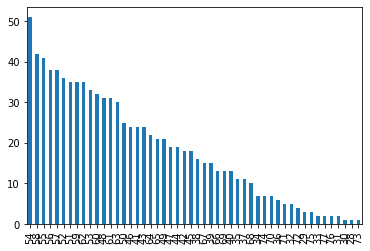

In [11]:
import matplotlib.pyplot as plt
df['Age'].value_counts().plot(kind='bar')
plt.show()

#### Exercise 4
Compute the rate of heart disease by age.

In [15]:
df[["Age", "HeartDisease"]].groupby (["Age"]).mean()

,HeartDisease
Age,
28,0.000000
29,0.000000
30,0.000000
31,0.500000
32,0.400000
33,0.500000
34,0.285714
35,0.363636
36,0.333333


#### Exercise 5
Add a column feature 

In [13]:
df['Feature']='NO DATA'
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Feature
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,NO DATA
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,NO DATA
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,NO DATA
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,NO DATA
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,NO DATA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,NO DATA
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,NO DATA
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,NO DATA
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,NO DATA
